# **PI**

In [101]:
# Importamos las librerías que estaremos utilizando

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report


In [102]:
# Cargamos el dataset
data = pd.read_excel('E-Commerce_train.xlsx')

In [103]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


In [104]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Mode_of_Shipment'] = label_encoder.fit_transform(data['Mode_of_Shipment'])

label_encoder = LabelEncoder()
data['Warehouse_block'] = label_encoder.fit_transform(data['Warehouse_block'])

label_encoder = LabelEncoder()
data['Product_importance'] = label_encoder.fit_transform(data['Product_importance'])

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [105]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,3,2,3,1,217,3,1,0,1,4177,1
8995,8996,4,2,5,3,232,3,2,1,3,4526,0
8996,8997,0,2,4,5,260,3,2,0,6,4221,0
8997,8998,1,2,4,2,184,3,2,0,5,5931,1


### `Pairplot`

En esta instancia, emplearemos un paso fundamental dentro de todo **EDA** que nos muestra todas las relaciones entre las variables cuantitativas del dataframe que estemos trabajando. La importancia de este paso radica en que nos permite elegir las mejores variables predictoras para nuestro modelo.


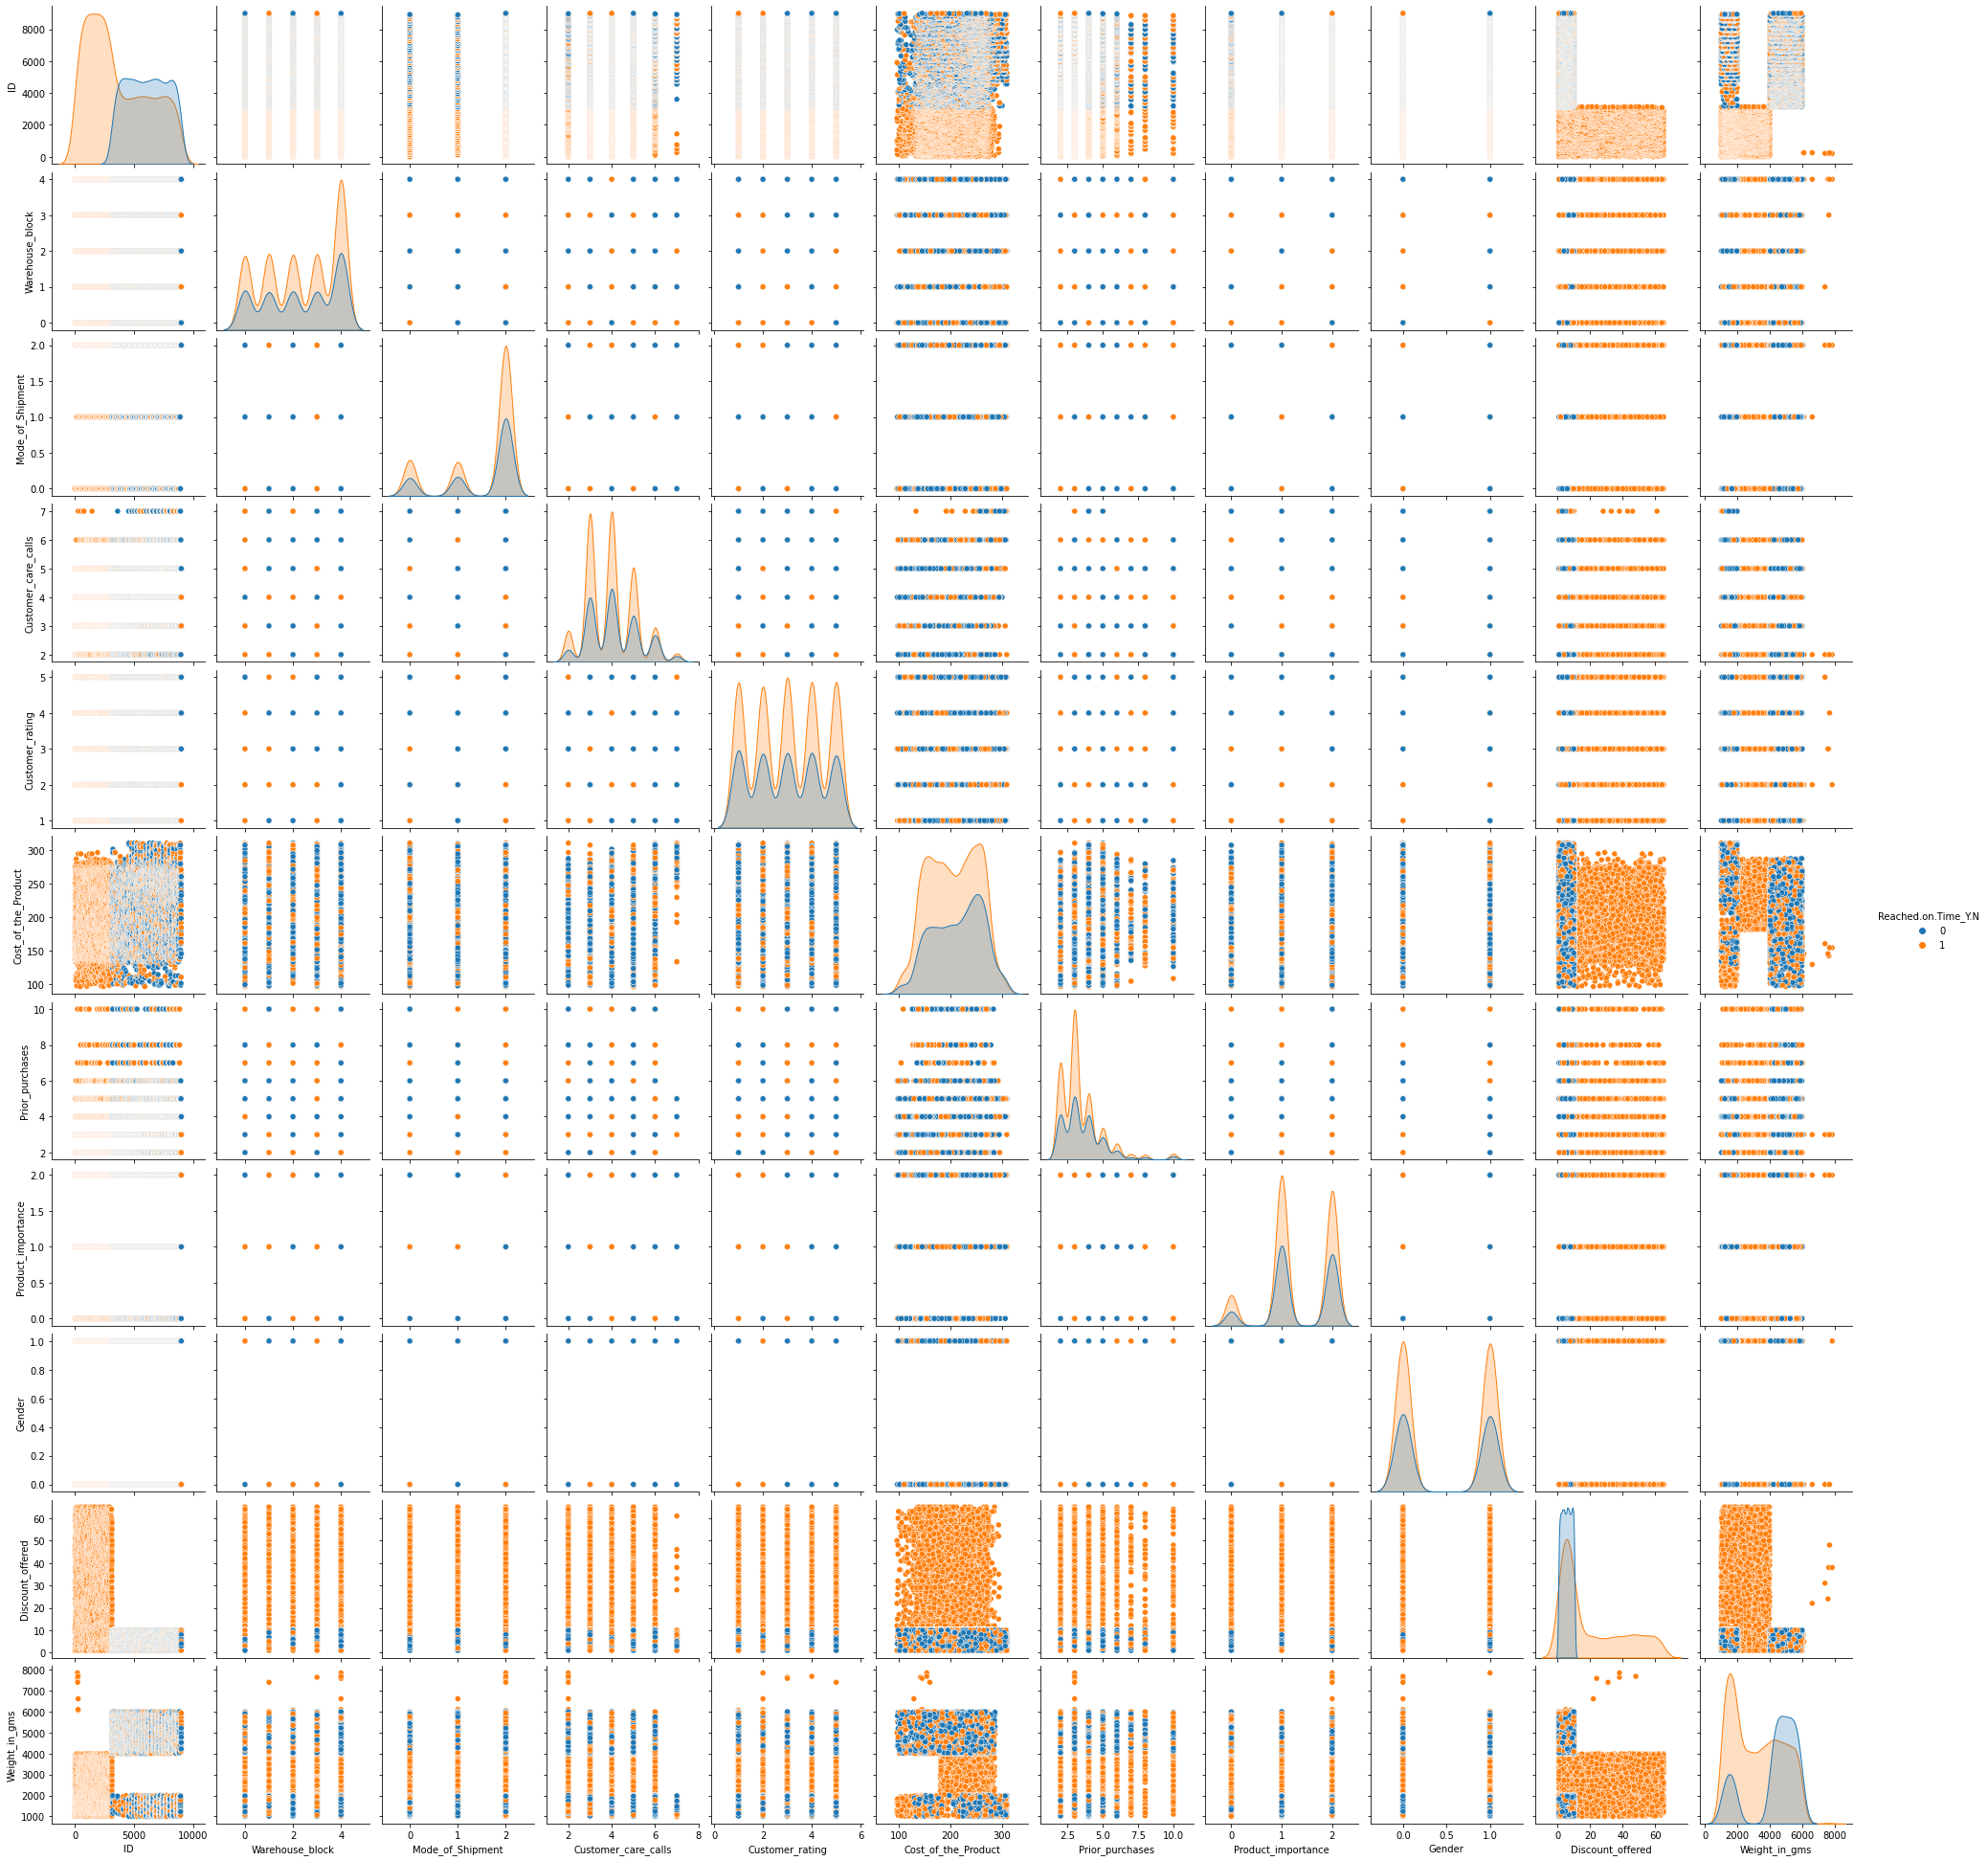

In [6]:
sns.pairplot(data, hue="Reached.on.Time_Y.N")
plt.show()

Separamos del dataframe dos atributos y las etiquetas. Llamaremos **`X`** a los features e **`y`** a las etiquetas.

In [106]:
X = data  # Denotamos X con mayúscula ya que incluye más de un atributo
y = data['Reached.on.Time_Y.N'] # Etiqueta a predecir

In [34]:
#X.drop(columns='ID', axis=1, inplace=True)

In [107]:
X.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [108]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

## **1. Árbol de decisión**

Ahora que tenemos nuestras variables predictoras `X`, por un lado, y nuestra varible a predecir `y`, por el otro, vamos a crear un modelo de árbol de decisión.

In [109]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 5, random_state = 100) 

Se establecio la profundidad coom predeterminada y un random state de 100

In [72]:
# Entrenamos el modelo

In [110]:
X.drop(columns='Reached.on.Time_Y.N', axis=1, inplace=True)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # With stratify

In [112]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=100)

In [113]:
# Exploramos algunas de las características del modelo entrenado.

print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(clf.feature_importances_)

[0 1]
2
11
[0.97169256 0.00163707 0.         0.         0.         0.00668353
 0.         0.         0.         0.00355165 0.01643519]


In [114]:
# Y Pred Train
y_pred_train = clf.predict(X_train)



In [115]:
y_pred_test = clf.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score, recall_score

print(recall_score(y_train,y_pred_train))
print(recall_score(y_test,y_pred_test))


0.6391256830601093
0.5987762237762237


In [117]:
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.58      0.87      0.70      2624
           1       0.89      0.64      0.75      4575

    accuracy                           0.72      7199
   macro avg       0.74      0.75      0.72      7199
weighted avg       0.78      0.72      0.73      7199

              precision    recall  f1-score   support

           0       0.54      0.84      0.66       656
           1       0.86      0.60      0.71      1144

    accuracy                           0.69      1800
   macro avg       0.70      0.72      0.68      1800
weighted avg       0.75      0.69      0.69      1800



Ahora **evaluaremos** nuestro modelo de clasificación.

### Importancia de los Atributos

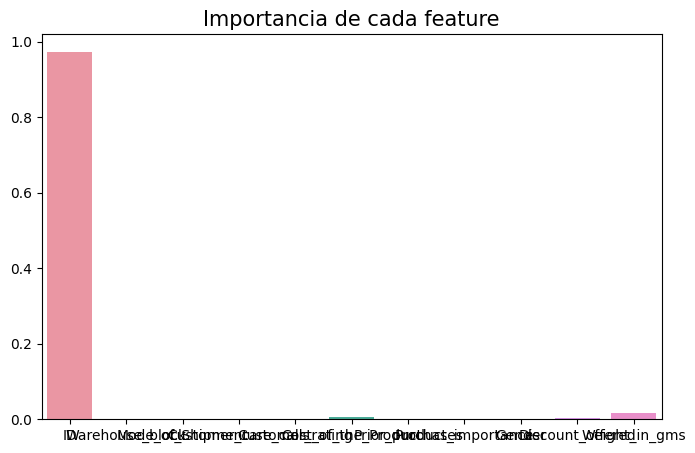

In [92]:
# Ploteamos la importancia de los atributos elegidos a la hora de hacer la predicción


plt.figure(figsize = (8,5))

importances = clf.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.show()

## Ahora Predecimos conforme al Archivo Test Provisto

In [118]:
datapred = pd.read_excel('E-Commerce_test.xlsx')

In [119]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
datapred['Mode_of_Shipment'] = label_encoder.fit_transform(datapred['Mode_of_Shipment'])

label_encoder = LabelEncoder()
datapred['Warehouse_block'] = label_encoder.fit_transform(datapred['Warehouse_block'])

label_encoder = LabelEncoder()
datapred['Product_importance'] = label_encoder.fit_transform(datapred['Product_importance'])

label_encoder = LabelEncoder()
datapred['Gender'] = label_encoder.fit_transform(datapred['Gender'])

In [120]:
datapred

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,4,2,5,1,189,2,2,1,10,5248
1,9001,3,2,5,3,150,2,0,0,9,4446
2,9002,4,2,3,3,200,3,1,1,3,5739
3,9003,0,2,5,1,133,2,2,1,1,4643
4,9004,1,2,4,2,260,3,1,1,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,0,2,4,1,252,5,2,0,1,1538
1996,10996,1,2,4,1,232,5,2,0,6,1247
1997,10997,2,2,5,4,242,5,1,0,4,1155
1998,10998,4,2,5,2,223,6,2,1,2,1210


In [121]:
Xtest = datapred

In [122]:
ypredfinal = clf.predict(Xtest)

In [123]:
ypredfinal

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Exportamos las prediciones a un Archivo CSV

In [125]:
MRXWallace = pd.DataFrame(ypredfinal)
MRXWallace.to_csv('MRXWallace.csv', index=False)

# Add the column name to the MRXWallace file
MRXWallace.columns = ['pred']
MRXWallace.to_csv('MRXWallace.csv', index=False)
